In [1]:
"""
Softmax simplex visulaizer
To show the relationshp between presoftmax 
values and the simplex projection

Joseph Paul Cohen 2018
Using code by David Andrzejewski

"""

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
"""
Visualize points on the 3-simplex (eg, the parameters of a
3-dimensional multinomial distributions) as a scatter plot 
contained within a 2D triangle.

David Andrzejewski (david.andrzej@gmail.com)
"""
import matplotlib.ticker as MT
import matplotlib.lines as L

def plotSimplex(points, fig=None, vertexlabels=['Class 1','Class 2','Class 3'], **kwargs):
    """
    Plot Nx3 points array on the 3-simplex 
    (with optionally labeled vertices) 
    
    kwargs will be passed along directly to matplotlib.pyplot.scatter    

    Returns Figure, caller must .show()
    """
    if(fig == None):        
        fig = plt.figure()
    # Draw the triangle
    l1 = L.Line2D([0, 0.5, 1.0, 0], # xcoords
                  [0, np.sqrt(3) / 2, 0, 0], # ycoords
                  color='k')
    fig.gca().add_line(l1)
    fig.gca().xaxis.set_major_locator(MT.NullLocator())
    fig.gca().yaxis.set_major_locator(MT.NullLocator())
    # Draw vertex labels
    fig.gca().text(-0.05, -0.05, vertexlabels[0])
    fig.gca().text(1.05, -0.05, vertexlabels[1])
    fig.gca().text(0.5, np.sqrt(3) / 2 + 0.05, vertexlabels[2])
    # Project and draw the actual points
    projected = projectSimplex(points)
    plt.scatter(projected[:,0], projected[:,1], **kwargs)       ;       
    # Leave some buffer around the triangle for vertex labels
    fig.gca().set_xlim(-0.2, 1.2)
    fig.gca().set_ylim(-0.2, 1.2)

    return fig    

def projectSimplex(points):
    """ 
    Project probabilities on the 3-simplex to a 2D triangle
    
    N points are given as N x 3 array
    """
    # Convert points one at a time
    tripts = np.zeros((points.shape[0],2))
    for idx in range(points.shape[0]):
        # Init to triangle centroid
        x = 1.0 / 2
        y = 1.0 / (2 * np.sqrt(3))
        # Vector 1 - bisect out of lower left vertex 
        p1 = points[idx, 0]
        x = x - (1.0 / np.sqrt(3)) * p1 * np.cos(np.pi / 6)
        y = y - (1.0 / np.sqrt(3)) * p1 * np.sin(np.pi / 6)
        # Vector 2 - bisect out of lower right vertex  
        p2 = points[idx, 1]  
        x = x + (1.0 / np.sqrt(3)) * p2 * np.cos(np.pi / 6)
        y = y - (1.0 / np.sqrt(3)) * p2 * np.sin(np.pi / 6)        
        # Vector 3 - bisect out of top vertex
        p3 = points[idx, 2]
        y = y + (1.0 / np.sqrt(3) * p3)
      
        tripts[idx,:] = (x,y)

    return tripts

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [3]:
def plot(x, y, z):
    step=0
    dot = np.asarray([x, y, z])
    testpoints = [softmax([x, y, z])]
    
    steps = np.arange(0.1,1,0.1)
    for i1 in steps:
        i1 = -np.log(i1)
        testpoints.append(softmax([x+i1, y, z]))
    for i1 in steps:
        i1 = -np.log(i1)
        testpoints.append(softmax([x, y+i1, z]))
    for i1 in steps:
        i1 = -np.log(i1)
        testpoints.append(softmax([x, y, z+i1]))
        
#     steps = np.arange(0.0,step,0.1)
#     for i1 in steps:
#         for i2 in steps:
#             for i3 in steps:
#                 if np.linalg.norm(np.subtract(dot, [x+i1, y+i2, z+i3]), 1).sum()<step:
#                     testpoints.append(softmax([x+i1, y+i2, z+i3]))
    
    testpoints = np.asarray(testpoints)
    
    cmap = matplotlib.cm.get_cmap('spectral')
    norm = matplotlib.colors.Normalize(vmin=0, vmax=len(testpoints))
    sizes = [5]*len(testpoints)
    sizes[0] = 100
    fig = plotSimplex(testpoints, s=sizes, cmap=cmap, norm=norm, c=range(len(testpoints)))
    # Make color-label legend
    plt.legend([matplotlib.patches.Rectangle((0, 0), 1, 1, fc=cmap(norm(idx)))
                for idx in range(len(testpoints[:1]))], 
                testpoints[:1])
    plt.show();

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets

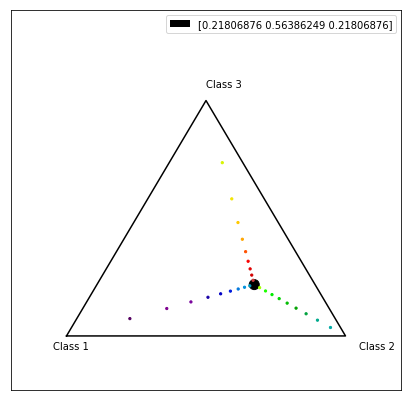

In [6]:
plt.rcParams['figure.figsize'] = (7, 7)
x_widget = ipywidgets.FloatSlider(min=-4.0, max=4.0, step=0.05);
y_widget = ipywidgets.FloatSlider(min=-4.0, max=4.0, step=0.05);
z_widget = ipywidgets.FloatSlider(min=-4.0, max=4.0, step=0.05);
#step = ipywidgets.FloatSlider(min=0, max=5, step=0.1);
interact(plot,x=x_widget, y=y_widget, z=z_widget)#, step=step);